In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 20000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
print(len(X_train), "train sequences")
print(len(X_test), "test sequences")
print(np.max(y_train)+1, "classes")

25000 train sequences
25000 test sequences
2 classes


In [3]:
print(X_train[0][:50])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447]


In [4]:
num_pad = 128  
X_train = pad_sequences(X_train, maxlen=num_pad)
X_test =  pad_sequences(X_test, maxlen=num_pad)
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)

x_train shape: (25000, 128)
x_test shape: (25000, 128)


In [13]:
wordsInSeqs0=[len(s) for i,s in enumerate(X_train) if y_train[i]==0]
wordsInSeqs1=[len(s) for i,s in enumerate(X_train) if y_train[i]==1]

print("Documents in category tech: ",len(wordsInSeqs0))
print("Documents in category general: ",len(wordsInSeqs1))

Documents in category tech:  12500
Documents in category general:  12500


In [5]:
num_embeddings = 256    # 임베딩 벡터의 차원
dropout_ratio = 0.3    # 드롭아웃 비율
num_filters = 128       # 커널의 수
kernel_size = 3        # 커널의 크기
hidden_units = 64     # 뉴런의 수

model = Sequential([ 
    Embedding(vocab_size, num_embeddings),
    Conv1D(num_filters, kernel_size, padding='valid', activation='relu'),
    GlobalMaxPooling1D(),
    Dense(hidden_units, activation='relu'),
    Dropout(dropout_ratio),
    Dense(1, activation='sigmoid')
])

In [6]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.7076 - loss: 0.5343 - val_accuracy: 0.8688 - val_loss: 0.3130
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.9311 - loss: 0.1864 - val_accuracy: 0.8726 - val_loss: 0.3085
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.9908 - loss: 0.0404 - val_accuracy: 0.8718 - val_loss: 0.3845
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.9978 - loss: 0.0122 - val_accuracy: 0.8686 - val_loss: 0.5106
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.8708 - val_loss: 0.5635
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 1.0000 - loss: 5.8567e-04 - val_accuracy: 0.8758 - val_loss: 0.5529
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - accuracy: 1.0000 - loss: 2.9262e-04 - val_accuracy: 0.8736 - val_loss: 0.5924
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 1.0000 - loss: 1

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 128, 256)              │       5,120,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (32, 126, 128)              │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (32, 128)                   │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,680,261 (59.82 MB)

 Trainable params: 5,226,753 (19.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,453,508 (39.88 MB)

In [9]:
score, acc = model.evaluate(X_test, y_test)
print("Test score:", score)
print("Test accuracy:", acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8408 - loss: 0.5652
Test score: 0.5592306852340698
Test accuracy: 0.8414000272750854


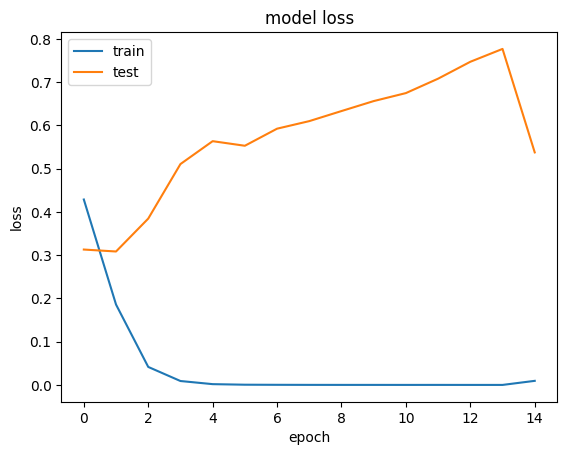

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

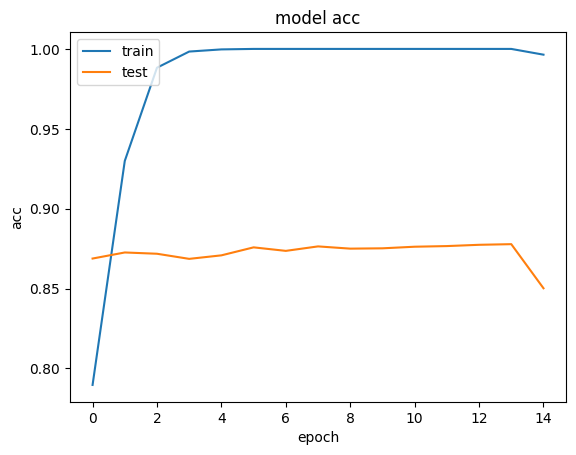

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()